## Cotton-Disease-Prediction

### Transfer Learning Inception V3

Import the required libraries

In [5]:
# import the libraries as shown below
from matplotlib import pyplot
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from keras.preprocessing.image import img_to_array
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator,load_img

In [7]:
#from tensorflow.keras.applications.efficientnet import EfficientNetB5
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
#from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
import numpy as np
from glob import glob

In [8]:
import seaborn as sns

Loading the data for Visualize the train and test data analysis

In [9]:
labels = ['diseased cotton leaf', 'diseased cotton plant','fresh cotton leaf','fresh cotton plant']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [10]:
#Now we can easily fetch our train and validation data.
train_path = get_data('/content/drive/MyDrive/Cotton Disease Dataset/train')
test_path = get_data('/content/drive/MyDrive/Cotton Disease Dataset/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


Visualize the train data analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Train data')

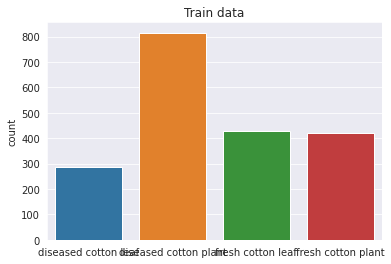

In [11]:
l = []
for i in train_path:
    if(i[1] == 0):
        l.append("diseased cotton leaf")
    if(i[1] == 1):
        l.append("diseased cotton plant")
    if(i[1] == 2):
        l.append("fresh cotton leaf")
    if(i[1] == 3):
        l.append("fresh cotton plant")
sns.set_style('darkgrid')
sns.countplot(l).set_title('Train data')

Visualize the test data analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Test data')

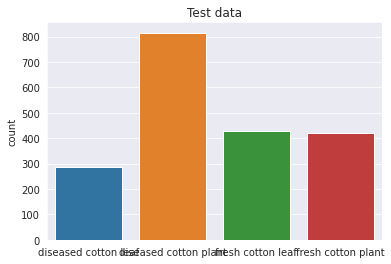

In [12]:
l = []
for i in train_path:
    if(i[1] == 0):
        l.append("diseased cotton leaf")
    if(i[1] == 1):
        l.append("diseased cotton plant")
    if(i[1] == 2):
        l.append("fresh cotton leaf")
    if(i[1] == 3):
        l.append("fresh cotton plant")
sns.set_style('darkgrid')
sns.countplot(l).set_title('Test data')

In [13]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

#Now we can easily fetch our train and validation data.
train_path = '/content/drive/MyDrive/Cotton Disease Dataset/train'
test_path = '/content/drive/MyDrive/Cotton Disease Dataset/test'

In [14]:
batch_size=32

In [15]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=90)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [16]:
# Make sure you provide the same target size as initialied for the image size
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [17]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Cotton Disease Dataset/train/*')

In [18]:
folders

['/content/drive/MyDrive/Cotton Disease Dataset/train/fresh cotton plant',
 '/content/drive/MyDrive/Cotton Disease Dataset/train/fresh cotton leaf',
 '/content/drive/MyDrive/Cotton Disease Dataset/train/diseased cotton plant',
 '/content/drive/MyDrive/Cotton Disease Dataset/train/diseased cotton leaf']

In [19]:
len(folders)

4

In [20]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

pre_model = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


# don't train existing weights
for layer in pre_model.layers:
    layer.trainable = False
    
for (i,layer) in enumerate(pre_model.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

87924736/87910968 [==============================] - 0s 0us/step
0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 Activation False
4 Conv2D False
5 BatchNormalization False
6 Activation False
7 Conv2D False
8 BatchNormalization False
9 Activation False
10 MaxPooling2D False
11 Conv2D False
12 BatchNormalization False
13 Activation False
14 Conv2D False
15 BatchNormalization False
16 Activation False
17 MaxPooling2D False
18 Conv2D False
19 BatchNormalization False
20 Activation False
21 Conv2D False
22 Conv2D False
23 BatchNormalization False
24 BatchNormalization False
25 Activation False
26 Activation False
27 AveragePooling2D False
28 Conv2D False
29 Conv2D False
30 Conv2D False
31 Conv2D False
32 BatchNormalization False
33 BatchNormalization False
34 BatchNormalization False
35 BatchNormalization False
36 Activation False
37 Activation False
38 Activation False
39 Activation False
40 Concatenate False
41 Conv2D False
42 BatchNormalization False
43 Activation False
44

In [21]:
def addTopModel(bottom_model, num_classes, D=512):
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.4)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [22]:
num_classes = len(folders)
FC_Layer = addTopModel(pre_model, num_classes)
model = Model(inputs=pre_model.input, outputs=FC_Layer)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [23]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [24]:
# tell the model what cost and optimization method to use
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr = 0.0001),
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## fitting the model

In [25]:
# fit the model
# Run the cell. It will take some time to execute
train_samples_count=1951
test_samples_count=106
epochs = 40
batch_size = 32

checkpoint = ModelCheckpoint("./weights.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
#Modelcheckpoint
#checkpoint = from tensorflow.keras.callbacks.ModelCheckpoint('./model.h5',monitor='val_loss',mode='min', verbose=1, save_best_only=True)

#callback = [tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')]


callback = [checkpoint]

history = model.fit_generator(
    train_generator,
    validation_data=test_generator,
    steps_per_epoch = train_samples_count // batch_size,
    validation_steps=test_samples_count // batch_size,
    epochs = epochs,
    callbacks = callback)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/40
60/60 [==============================] - ETA: 0s - loss: 1.1529 - accuracy: 0.7108
Epoch 1: val_loss improved from inf to 0.46837, saving model to ./weights.h5
60/60 [==============================] - 56s 719ms/step - loss: 1.1529 - accuracy: 0.7108 - val_loss: 0.4684 - val_accuracy: 0.8125
Epoch 2/40
60/60 [==============================] - ETA: 0s - loss: 0.3822 - accuracy: 0.8619
Epoch 2: val_loss improved from 0.46837 to 0.32563, saving model to ./weights.h5
60/60 [==============================] - 41s 676ms/step - loss: 0.3822 - accuracy: 0.8619 - val_loss: 0.3256 - val_accuracy: 0.8958
Epoch 3/40
60/60 [==============================] - ETA: 0s - loss: 0.3635 - accuracy: 0.8640
Epoch 3: val_loss improved from 0.32563 to 0.21441, saving model to ./weights.h5
60/60 [==============================] - 40s 674ms/step - loss: 0.3635 - accuracy: 0.8640 - val_loss: 0.2144 - val_accuracy: 0.9167
Epoch 4/40
60/60 [==============================] - ETA: 0s - loss: 0.3025 - accura

## Plotting loss and accuracy

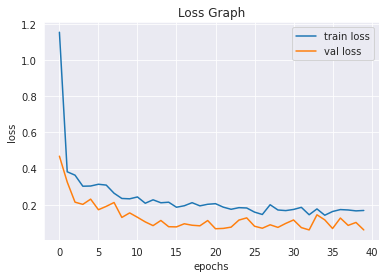

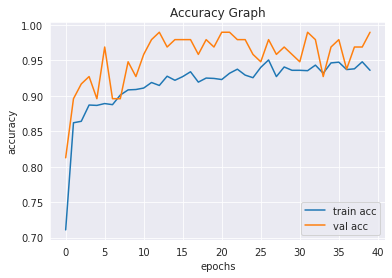

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('epochs') 
plt.ylabel('loss')
plt.title('Loss Graph')  
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('epochs') 
plt.ylabel('accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Saving the model to reuse

In [27]:
model.save('model_inception.h5')

In [28]:
model.load_weights("model_inception.h5")

In [29]:
pwd

'/content'

In [30]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

In [31]:
class_indices

{0: 'diseased cotton leaf',
 1: 'diseased cotton plant',
 2: 'fresh cotton leaf',
 3: 'fresh cotton plant'}

In [32]:
y_pred = model.predict(test_generator)

In [33]:
y_pred = np.argmax(y_pred, axis=1)

In [34]:
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_indices.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[25  0  0  0]
 [ 0 28  0  0]
 [ 0  0 25  1]
 [ 0  0  0 27]]
Classification Report
                       precision    recall  f1-score   support

 diseased cotton leaf       1.00      1.00      1.00        25
diseased cotton plant       1.00      1.00      1.00        28
    fresh cotton leaf       1.00      0.96      0.98        26
   fresh cotton plant       0.96      1.00      0.98        27

             accuracy                           0.99       106
            macro avg       0.99      0.99      0.99       106
         weighted avg       0.99      0.99      0.99       106



In [35]:
from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(true_classes, y_pred)
print("Inception V3 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

Inception V3 Model Accuracy without Fine-Tuning: 99.06%


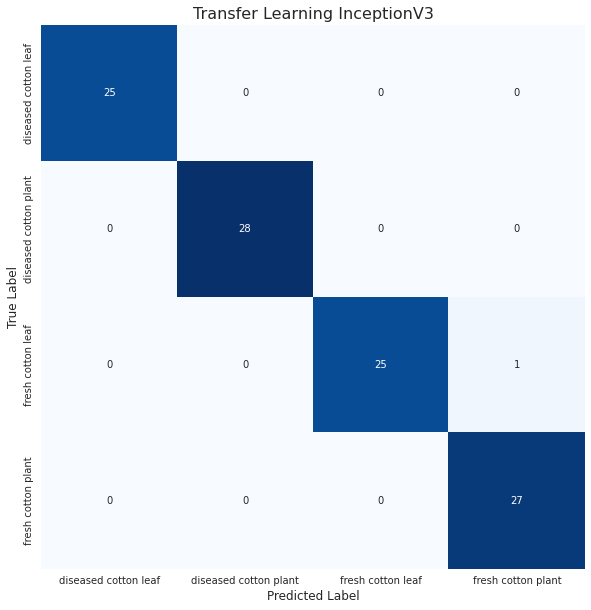

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the names of the 4 classes
class_names = test_generator.class_indices.keys()

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

fig, (ax1) = plt.subplots(1,1,figsize=(20, 10))

plot_heatmap(true_classes, y_pred,class_names,ax1, title="Transfer Learning InceptionV3")    
    
plt.show()

In [ ]:
pwd


'/content'